In [ ]:
!conda install -c delichon pandas_datareader

In [2]:
from pandas_datareader import data 
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go

ModuleNotFoundError: No module named 'pandas_datareader'

In [3]:
from snowflake.snowpark.session import Session
from snowflake.snowpark import functions as F
from snowflake.snowpark.types import *
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from snowflake.snowpark.functions import udf
%matplotlib inline
import datetime as dt
import numpy as np
import seaborn as sns

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler
import snowflake.connector
# to save the trained scaler class
import joblib

#Snowflake connection info
# from config import snowflake_conn_prop

import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt



snowflake_conn_prop = {
   "account": "se58322-fsesg",
   "user": "Muhammad Nauman",
   "password": "Muhammad23",
   "role": "RL_ESG_OBJECTS_DEVELOPER",
   "database": "DL_ESG_DEV",
   "schema": "ESG",
   "warehouse": "WH_ESG_SUSTAINABILITY",
}

from snowflake.snowpark import version
print(version.VERSION)


connection_paramter = snowflake.connector.connect(account = "se58322-fsesg",
                        user="Muhammad Nauman",
                        password="Muhammad23",
                        role="RL_ESG_OBJECTS_DEVELOPER",
                        warehouse="WH_ESG_SUSTAINABILITY",
                        ocsp_fail_open=False)

session = Session.builder.configs(snowflake_conn_prop).create()
print(session.sql('select current_warehouse(), current_database(), current_schema()').collect())

/Users/muhammadnauman/opt/anaconda3/envs/ESG_MVP_IBM/lib/python3.8/site-packages/snowflake/connector/options.py:96: UserWarning: You have an incompatible version of 'pyarrow' installed (10.0.1), please install a version that adheres to: 'pyarrow<8.1.0,>=8.0.0; extra == "pandas"'
  warn_incompatible_dep(


(1, 0, 0)
[Row(CURRENT_WAREHOUSE()='WH_ESG_SUSTAINABILITY', CURRENT_DATABASE()='DL_ESG_DEV', CURRENT_SCHEMA()='ESG')]


In [4]:
qry = 'select * from DL_ESG_DEV.CUSTOMER.STOCK_DATA'

df = pd.read_sql(qry, connection_paramter)

stock_df = df.copy()
# articles_df = articles_df[articles_df['eventType'] == 'CONTENT SHARED']
# esg_df.head(5)

/var/folders/nr/vyfq21gx5pn1p0025dclx97c0000gn/T/ipykernel_55981/2474735097.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(qry, connection_paramter)


In [5]:
gb = stock_df.groupby('TICKER')    
split_stocks = [gb.get_group(x) for x in gb.groups]

In [6]:
for ix in range(len(split_stocks)):
    split_stocks[ix]['movement'] = split_stocks[ix]['CLOSE'] - split_stocks[ix]['OPEN']

/var/folders/nr/vyfq21gx5pn1p0025dclx97c0000gn/T/ipykernel_55981/1822728989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  split_stocks[ix]['movement'] = split_stocks[ix]['CLOSE'] - split_stocks[ix]['OPEN']
/var/folders/nr/vyfq21gx5pn1p0025dclx97c0000gn/T/ipykernel_55981/1822728989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  split_stocks[ix]['movement'] = split_stocks[ix]['CLOSE'] - split_stocks[ix]['OPEN']
/var/folders/nr/vyfq21gx5pn1p0025dclx97c0000gn/T/ipykernel_55981/1822728989.py:2: Settin

In [30]:
movements = []
movements_full = []
for ix in range(len(split_stocks)):
    movements.append(list(split_stocks[ix]['movement'].to_numpy())[:180])
    movements_full.append(list(split_stocks[ix]['movement'].to_numpy()))

In [49]:
## With just normalized data
# Import the necessary packages
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
# Define a normalizer
normalizer = Normalizer()
# Create Kmeans model
kmeans = KMeans(n_clusters =13,max_iter = 1000)
# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to daily stock movements
pipeline.fit(movements)
labels = pipeline.predict(movements)

# # Fit pipeline to daily stock movements
# pipeline.fit(movements_full)
# labels = pipeline.predict(movements_full)

/Users/muhammadnauman/opt/anaconda3/envs/ESG_MVP_IBM/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [50]:
companies = list(set(list(stock_df['TICKER'].to_numpy())))
# labels
df1 = pd.DataFrame({'labels':labels,'companies':list(companies)}).sort_values(by=['labels'],axis = 0)

In [51]:
df1

,labels,companies
135,0,LIN
140,0,ENPH
49,0,PFE
150,0,VRSK
68,0,IP
...,...,...
153,11,FDX
157,11,CMG
127,11,CSX
42,11,BLK


In [52]:
from sklearn.decomposition import PCA
# Define a normalizer
normalizer = Normalizer()
# Reduce the data
reduced_data = PCA(n_components = 2)
# Create Kmeans model
kmeans = KMeans(n_clusters = 13,max_iter = 1000)
# Make a pipeline chaining normalizer, pca and kmeans
pipeline = make_pipeline(normalizer,reduced_data,kmeans)
# Fit pipeline to daily stock movements
pipeline.fit(movements)
# Prediction
labels = pipeline.predict(movements)
# Create dataframe to store companies and predicted labels
df2 = pd.DataFrame({'labels':labels,'companies':list(companies)}).sort_values(by=['labels'],axis = 0)

df2

/Users/muhammadnauman/opt/anaconda3/envs/ESG_MVP_IBM/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,labels,companies
149,0,RTX
64,0,CPRT
120,0,SCL
162,0,HBI
158,0,CRL
...,...,...
99,12,BRO
21,12,NCLH
165,12,BIO
9,12,VLO


<Figure size 640x480 with 0 Axes>

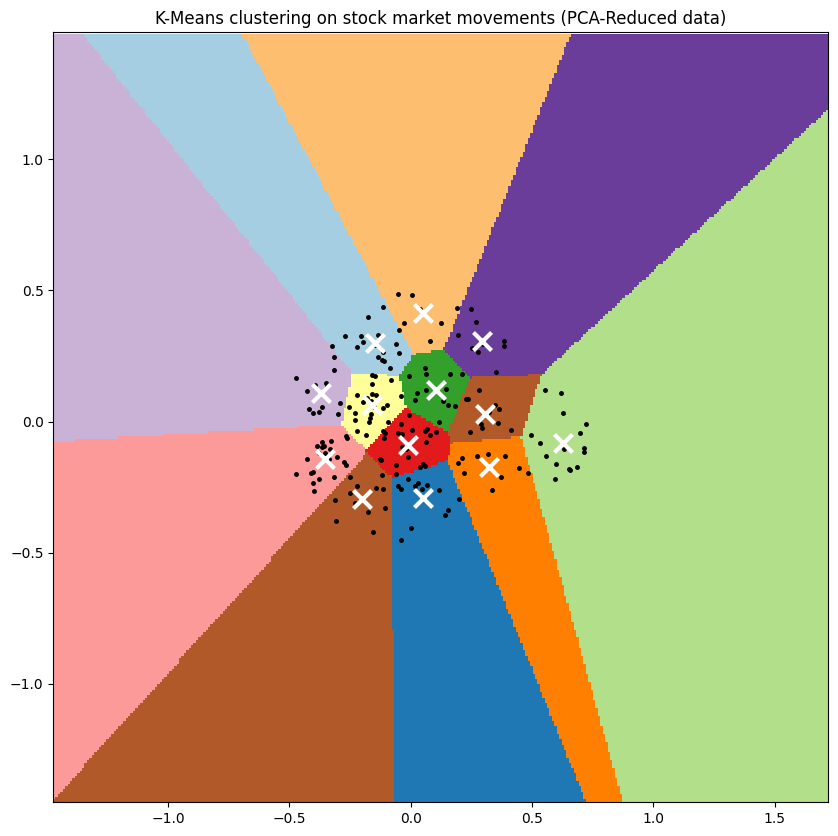

In [53]:
from sklearn.decomposition import PCA

normalizer = Normalizer() # Define a Normalizer
norm_movements = normalizer.fit_transform(movements) # Fit and
# Reduce the data
reduced_data = PCA(n_components = 2).fit_transform(norm_movements)
# Define step size of mesh
h = 0.01
# Plot the decision boundary
x_min,x_max = reduced_data[:,0].min()-1, reduced_data[:,0].max() + 1
y_min,y_max = reduced_data[:,1].min()-1, reduced_data[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# Define color plot
cmap = plt.cm.Paired
# Plotting figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,interpolation = 'nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = 'auto',origin = 'lower')
plt.plot(reduced_data[:,0],reduced_data[:,1],'k.',markersize = 5)
# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 169,linewidths = 3,color = 'w',zorder = 10)
plt.title('K-Means clustering on stock market movements (PCA-Reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()

In [ ]:
stock_open = np.array(df['OPEN']).T # stock_open is numpy array of transpose of df['Open']
stock_close = np.array(df['CLOSE']).T # stock_close is numpy array of transpose of df['Close']

In [ ]:
movements = stock_close - stock_open
# sum_of_movement = np.sum(movements,1)
movements

In [ ]:
sum_of_movement = np.sum(movements,1)
